In [2]:
## Generating Caption and Audio for new Image

In [ ]:
from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for i in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text


# extract features from each photo in the directory
def extract_features(filename):
    # load the model
    model = VGG16()
    # re-structure the model
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    # extract features from each photo
    features = dict()
    # load the photo
    image = load_img(filename, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get features
    feature = model.predict(image, verbose=0)
    return feature

dog is running through the grass


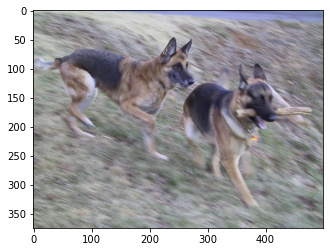

In [3]:
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
model = load_model('model_18.h5')
# load and prepare the photograph
img = mpimg.imread('Sample_images/test1.jpg')
imgplot = plt.imshow(img)
photo = extract_features('Sample_images/test1.jpg')
# generate description
description = generate_desc(model, tokenizer, photo, max_length)
query = description
stopwords = ['startseq','endseq']
querywords = query.split()

resultwords  = [word for word in querywords if word.lower() not in stopwords]
result = ' '.join(resultwords)

print(result)

In [ ]:
## Text to speech

import pyttsx3
def speak(audio):
    engine = pyttsx3.init()

    engine.say(audio)
    engine.runAndWait()

In [ ]:
## Speech Recognition

def takeCommand():
     
    r = sr.Recognizer()
     
    with sr.Microphone() as source:
         
        print("Listening...")
        r.pause_threshold = 1
        audio = r.listen(source)
  
    try:
        print("Recognizing...")   
        query = r.recognize_google(audio, language ='en-in')
        print(f"User said: {query}\n")
  
    except Exception as e:
        print(e)   
        print("Unable to Recognize your voice.") 
        return "None"
     
    return query

In [1]:
## Run the cell below, and say "what do you see?" and wait for the results

In [ ]:
import speech_recognition as sr
query = takeCommand().lower()



if query == "what do you see":
    
    ##Image capture
    from ecapture import ecapture as ec
    ec.delay_imcapture(0,False,"test3.jpg",5) ##Image stored as test3.jpg
    img = mpimg.imread('test3.jpg')   
    imgplot = plt.imshow(img)
    
    ##Feature extraction from test3.jpg
    photo = extract_features('test3.jpg')  
    ##Caption Generation
    description = generate_desc(model, tokenizer, photo, max_length)
    query1 = description
    stopwords = ['startseq','endseq']
    querywords = query1.split()
    resultwords  = [word for word in querywords if word.lower() not in stopwords]
    result = ' '.join(resultwords)
    print(result)
    
    ## Text to speech
    speak(result)
    
